In [ ]:
import pandas as pd
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Load the translation table in a pandas dataframe
df = pd.read_csv("/content/drive/MyDrive/Chiros Dataset/cjhif_translation_table.tsv", sep="\t")
print(f"There are {len(df)} compounds in the translation table.")

There are 44209 compounds in the translation table.


In [11]:
# Load the correction table, assuming the file exists
df_correction = pd.read_csv("/content/drive/MyDrive/Chiros Dataset/corrected_pubchem.tsv", sep="\t")
print(f"There are {len(df_correction)} compounds in the correction table.")

There are 525 compounds in the correction table.


In [12]:
new_data = ["NAME_HERE", "SMILES_HERE"]
df_correction.loc[len(df_correction)] = new_data
print(f"{new_data[0]} has been added to the correction table.")

NAME_HERE has been added to the correction table.


In [14]:
# Save the file and reload it
df_correction.to_csv(
    "/content/drive/MyDrive/Chiros Dataset/corrected_pubchem.tsv", sep="\t", index=False
)
df_correction = pd.read_csv("/content/drive/MyDrive/Chiros Dataset/corrected_pubchem.tsv", sep="\t")

### Visualization of the non-translated names

In [15]:
# Extract the non-translated compounds
empty_pubchem_iso = df[df["pubchem_isosmiles"] == "empty"]
empty_pubchem_iso = empty_pubchem_iso[empty_pubchem_iso["Compound"] != "empty"]

# remove the raw if the name is in df_correction[0]
for i in df_correction["Name"]:
    empty_pubchem_iso = empty_pubchem_iso[empty_pubchem_iso["Compound"] != i]

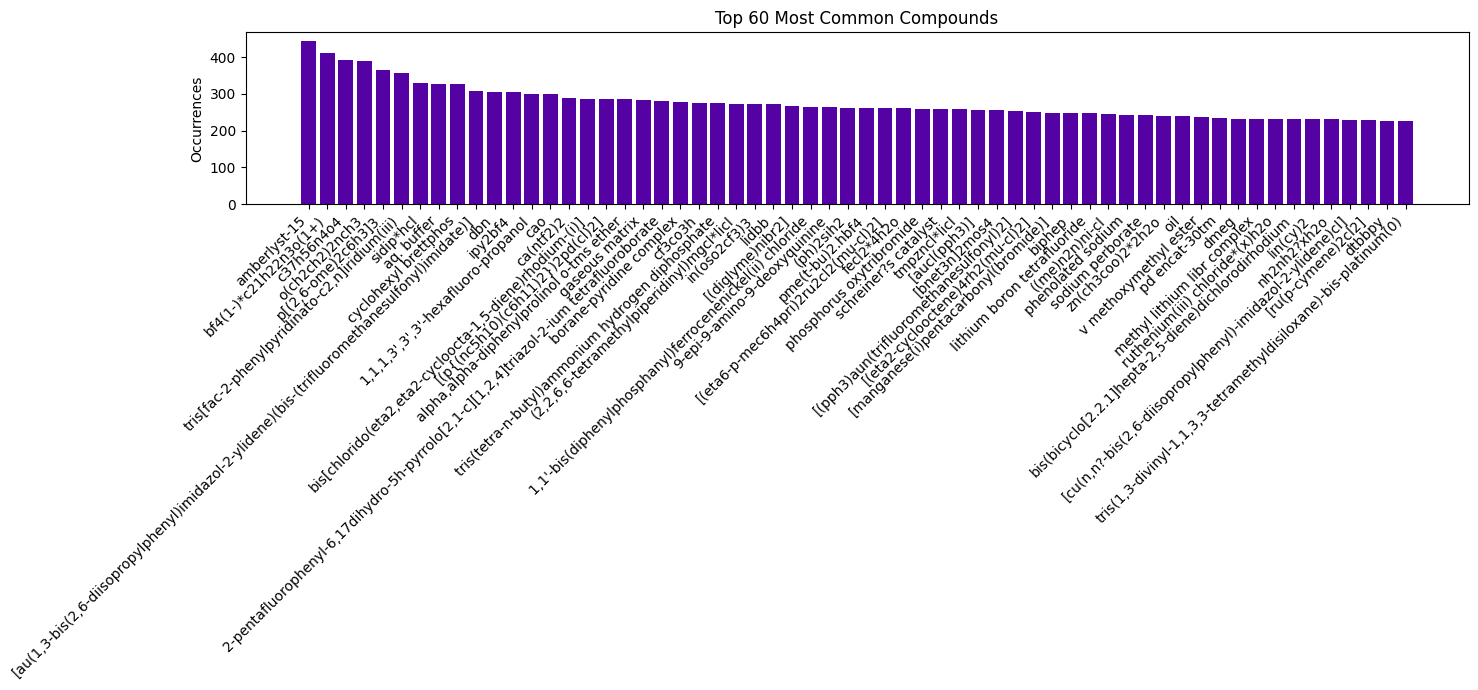

1. amberlyst-15: 445
2. bf4(1-)*c21h22n3o(1+): 411
3. c37h56n4o4: 392
4. o(ch2ch2)2nch3: 389
5. p[(2,6-ome)2c6h3]3: 365
6. tris[fac-2-phenylpyridinato-c2,n]iridium(iii): 358
7. sidip*hcl: 329
8. aq. buffer: 328
9. cyclohexyl brettphos: 328
10. [au(1,3-bis(2,6-diisopropylphenyl)imidazol-2-ylidene)(bis-(trifluoromethanesulfonyl)imidate)]: 308
11. dbn: 304
12. ipy2bf4: 304
13. 1,1,1,3',3',3'-hexafluoro-propanol: 301
14. cao: 301
15. ca(ntf2)2: 290
16. bis[chlorido(eta2,eta2-cycloocta-1,5-diene)rhodium-(i)]: 286
17. [(p{(nc5h10)(c6h11)2})2pd(cl)2]: 285
18. alpha,alpha-diphenylprolinol o-tms ether: 285
19. gaseous matrix: 284
20. 2-pentafluorophenyl-6,17dihydro-5h-pyrrolo[2,1-c][1,2,4]triazol-2-ium tetrafluoroborate: 280
21. borane-pyridine complex: 279
22. cf3co3h: 274
23. tris(tetra-n-butyl)ammonium hydrogen diphosphate: 274
24. (2,2,6,6-tetramethylpiperidinyl)mgcl*licl: 272
25. in(oso2cf3)3: 272
26. lidbb: 272
27. [(diglyme)nibr2]: 267
28. 1,1'-bis(diphenylphosphanyl)ferrocenenickel(ii) 

In [16]:
import matplotlib.pyplot as plt
import pandas as pd


def plot_top_compounds(df: pd.DataFrame, top_N: int = 30):
    data = dict(zip(df["Compound"], df["Occurrences"]))

    sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)

    top_compounds = sorted_data[:top_N]
    labels, values = zip(*top_compounds)

    plt.figure(figsize=(15, 7))
    plt.bar(labels, values, color="#5402A3")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Occurrences")
    plt.title(f"Top {top_N} Most Common Compounds")
    plt.tight_layout()
    plt.show()

    for i, (compound, occurrence) in enumerate(top_compounds, start=1):
        print(f"{i}. {compound}: {occurrence}")


plot_top_compounds(empty_pubchem_iso, top_N=60)

### Manual correction of chiral reagents and catalysts

In [17]:
# Selecting compound only with +, -, (r) or (s) in the name


def select_compound(df: pd.DataFrame):
    df = df[
        df["Compound"].str.contains("\(\+\)")
        | df["Compound"].str.contains("\(\-\)")
        | df["Compound"].str.contains("\(r\)")
        | df["Compound"].str.contains("\(s\)")
    ]
    return df


empty_pubchem_chiral = select_compound(empty_pubchem_iso)
empty_pubchem_chiral[empty_pubchem_chiral["Occurrences"] > 50]

,Compound,Occurrences,pubchem_isosmiles
709,"(1r,2r)-(-)-trans-1,2-diaminocyclohexane",60,empty
3015,"(r)-(+)-5,5',6,6',7,7',8,8'-octahydro-bi-2-nap...",59,empty
3038,"(r)-(-)-5,5'-bis(diphenylphosphino)-2,2,2',2'-...",86,empty
3066,"(r)-(6-methoxyquinolin-4-yl)((1s,2s,4s,5r)-5-v...",62,empty
3077,(r)-(s)-ppf-pcy2,52,empty
3139,"(r)-2,6-bis(naphthalen-2-yl)-4-oxo-3,5-dioxa-4...",66,empty
3140,"(r)-2,6-bis-(4-chloro-phenyl)-4-oxo--3,5-dioxa...",69,empty
3232,"(r)-3,3?-bis(2,3,5,6-tetrafluoro-4-(trifluorom...",64,empty
3497,(r)-pa,75,empty
3940,"(s)-(+)-(3,5-dioxa-4-phosphacyclohepta[2,1-a;3...",75,empty


Clustering

* Here we will cluster the names that were not translated using the DBSCAN algorithm. Once the names are clustered, we corrected them manually starting from the cluster that have the most occurrence.

---



In [20]:
# This takes about 10 minutes to run

import ast

import numpy as np
import pandas as pd
from fuzzywuzzy import fuzz
from sklearn.cluster import DBSCAN


def get_similarity_matrix(compounds):
    num_compounds = len(compounds)
    similarity_matrix = np.zeros((num_compounds, num_compounds))
    for i in range(num_compounds):
        for j in range(i, num_compounds):
            similarity = fuzz.ratio(compounds[i], compounds[j])
            similarity_matrix[i, j] = similarity_matrix[j, i] = similarity
    return similarity_matrix


compounds = empty_pubchem_iso["Compound"].tolist()
similarity_matrix = get_similarity_matrix(compounds)

distance_matrix = 1 - similarity_matrix / 100.0

db = DBSCAN(eps=0.1, min_samples=1, metric="precomputed")
clusters = db.fit_predict(distance_matrix)
empty_pubchem_iso["cluster"] = clusters


clustered_data = (
    empty_pubchem_iso.groupby("cluster")
    .agg(
        Total_Occurrences=("Occurrences", "sum"),
        Compound_List=("Compound", list),
        Num_Compounds=("Compound", "count"),
    )
    .sort_values(by="Total_Occurrences", ascending=False)
    .reset_index()
)

# save results
clustered_data.to_csv("clustered_data.csv", index=False)

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


KeyboardInterrupt: 

In [19]:
clustered_data = pd.read_csv("clustered_data.csv")

In [ ]:
clustered_data.head(10)

In [ ]:
# Show the compounds in a cluster by dataframe index
cluster_index = 1
print(ast.literal_eval(clustered_data["Compound_List"][cluster_index]))

In [ ]:
# Add names and SMILES to the correction table

new_smiles = "NEW_SMILES_HERE"
cluster_index = 1
for k in ast.literal_eval(clustered_data["Compound_List"][cluster_index]):
    new_data = [k, new_smiles]
    df_correction.loc[len(df_correction)] = new_data

clustered_data.drop(index=index, inplace=True)
df_correction.to_csv("corrected_pubchem.tsv", sep="\t", index=False)
df_correction = pd.read_csv("/content/drive/MyDrive/Chiros Dataset/corrected_pubchem.tsv", sep="\t")
print("Dataset updated and saved.")